## Calculating scores and the number of comments of each type

In [3]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import fasttext
import csv

def get_comments(file):
    doc = open(file)
    doc_comments = csv.reader(doc, delimiter=';')
    lst = []

    for i in doc_comments:
        lst.append(i)

    flat_list = []
    for sublist in lst:
        for item in sublist:
            flat_list.append(item)

    return flat_list


comments = get_comments('reviews.csv')

fasttext.FastText.eprint = lambda x: None

tokenizer = RegexTokenizer()

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results = model.predict(comments, k=5)

negative = 0
positive = 0
neutral = 0
skip = 0

for sentiment in results:
    if float(sentiment['negative']) >= 0.25 or float(sentiment['positive']) >= 0.35:
        if float(sentiment['negative']) >= 0.25 and float(sentiment['positive']) >= 0.35:
            if float(sentiment['positive']) > float(sentiment['negative']):
                positive += 1
            else:
                negative += 1
        if float(sentiment['negative']) >= 0.25:
            negative += 1
        if float(sentiment['positive']) >= 0.25:
            positive += 1
    elif float(sentiment['neutral']) >= 0.25:
        neutral += 1
    else:
        skip += 1

print(f'The number of negative comments are {negative}')
print(f'The number of positive comments are {positive}')
print(f'The number of neutral comments are {neutral}')
print(f'The number of skipped comments are {skip}')

The number of negative comments are 59
The number of positive comments are 103
The number of neutral comments are 122
The number of skipped comments are 33


## Creating plots

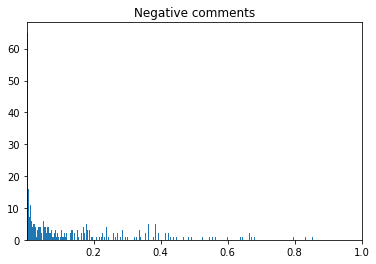

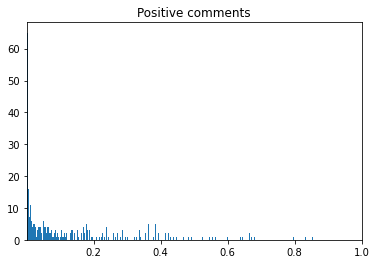

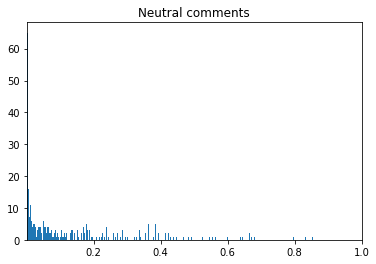

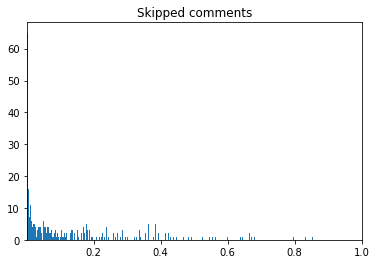

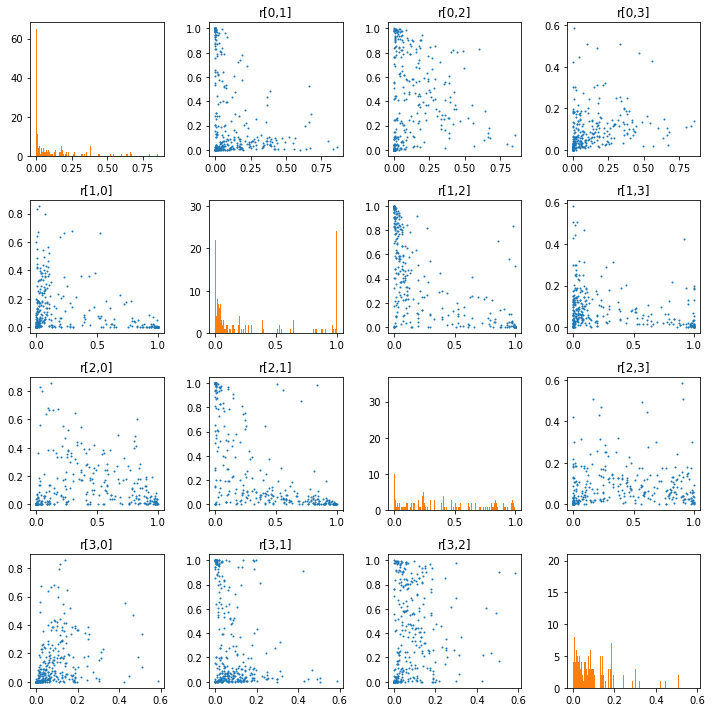

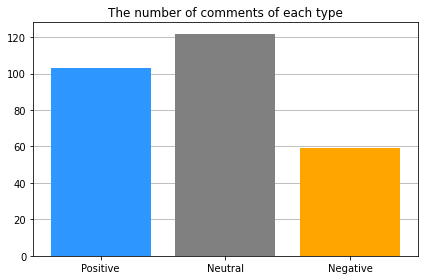

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = [None] * len(results)
n = 0

for sentiment in results:
    data[n] = [float(sentiment['negative']), float(sentiment['positive']), float(sentiment['neutral']), float(sentiment['skip']), float(sentiment['speech'])]
    n += 1

data = np.array(data)

x1 = data[:, 0]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Negative comments')
ax.set_xlim(1e-5,)
ax.hist(x1, bins=300);
plt.savefig('negative.png')

x2 = data[:, 1]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Positive comments')
ax.set_xlim(1e-5,)
ax.hist(x1, bins=300);
plt.savefig('positive.png')

x3 = data[:,2]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Neutral comments')
ax.set_xlim(1e-5,)
ax.hist(x1, bins=300);
plt.savefig('neutral.png')

x4 = data[:, 3]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Skipped comments')
ax.set_xlim(1e-5,)
ax.hist(x1, bins=300);
plt.savefig('skipped.png')

# x5 = data[:, 4]
# fig, ax = plt.subplots()
# fig.patch.set_facecolor('white')
# plt.title('speech')
# ax.hist(x1, bins=300);


N = 4
fig, axs = plt.subplots(nrows=N, ncols=N, figsize=(10, 10))
fig.patch.set_facecolor('white')
for i in range(N):
    for j in range(N):
        if i == j:
            axs[i, i].hist(data[:, i], bins=300, color='C1')
        else:
            axs[i, j].scatter(data[:, i], data[:, j], s=1)
            axs[i, j].set_title(f"r[{i},{j}]")

fig.tight_layout()
plt.savefig('many_in_one.png')

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('The number of comments of each type')
ax.grid(axis='y')
ax.set_axisbelow(True)
types = ['Positive', 'Neutral', 'Negative']
numbers = [positive, neutral, negative]
ax.bar(types, numbers, color=['#2E97FF', 'grey', 'orange'])
fig.tight_layout()
plt.savefig('compare.png')
